# <span style="color:#bc5a45; font-family: Trebuchet MS; font-size: 50px; font-weight: bold;">Prediction of Diabetes patients</span>

# <span style="color:#bc5a45; font-family: Trebuchet MS; font-size: 30px; font-weight: bold;">Description</span>
- We want to train a model that can predict whether a patient with certain medical properties has diabetes or not.
- For such a purpose, we use different techniques to train the model with the highest performance and accuracy.

# <span style="color:#bc5a45; font-family: Trebuchet MS; font-size: 30px; font-weight: bold;">Motivation</span>
- This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans.
- Additionally, the dataset can be used by researchers to explore the relationships between various medical and demographic factors and the likelihood of developing diabetes.

# <span style="color:#bc5a45; font-family: Trebuchet MS; font-size: 30px; font-weight: bold;">Dataset</span>
- We obtained ‘Diabetes prediction’ dataset from the following URL:
- https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset/data
- The 'Diabetes prediction dataset' is a collection of medical and demographic data from patients,
along with their diabetes status (positive or negative).
- The data includes features such as age, gender, body mass index (BMI), hypertension, heart
disease, smoking history, HbA1c level, and blood glucose level.

# <span style="color:#bc5a45; font-family: Trebuchet MS; font-size: 30px; font-weight: bold;">Related Works</span>
- URL: Diabetes dataset 1
- URL: Diabetes dataset 2
- URL: Pima Indians Diabetes Database
- URL: Predict Diabetes dataset



In [ ]:
if True:
    %pip install -qqq numpy scipy matplotlib pandas scikit-learn seaborn plotly

In [1]:
# Import necessary modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

from warnings import filterwarnings
filterwarnings("ignore")

# <span style="color:#bc5a45; font-family: Trebuchet MS; font-size: 45px; font-weight: bold;">Data Understanding</span>

In [49]:
# Define the file path for the dataset
file_path = './diabetes_prediction_dataset-100000.csv'

# Load the dataset from the specified file path using pandas
data = pd.read_csv(file_path)

In [50]:
# Display the first few rows of the DataFrame to preview the data
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [51]:
# Retrieve and display the dimensions of the DataFrame (number of rows and columns)
data.shape

(100000, 9)

In [52]:
# Display a concise summary of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [53]:
# Generate descriptive statistics of DataFrame
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


In [54]:
# Calculate and display the number of missing values in each column of the DataFrame
# We do not have missing values in our dataset
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [55]:
# Check if there are any duplicated rows in the DataFrame
# There are duplicated values in our dataset
data.duplicated().sum().any()

True

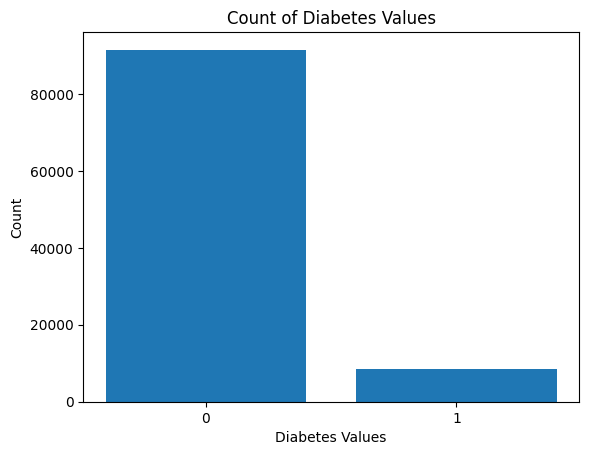

In [79]:
# Assuming 'diabetes' is the column name
diabetes_counts = data['diabetes'].value_counts()

# Creating a bar chart
plt.bar(diabetes_counts.index, diabetes_counts.values)
plt.xlabel('Diabetes Values')
plt.ylabel('Count')
plt.title('Count of Diabetes Values')
plt.xticks(diabetes_counts.index)  # Set x-axis ticks to 0 and 1
plt.show()



# <span style="color:#bc5a45; font-family: Trebuchet MS; font-size: 45px; font-weight: bold;">Data Preparation</span>

In [31]:
# Remove the duplicate rows in the DataFrame if necessary
#data.drop_duplicates(inplace=True)

In [40]:
# Replace 'Female' with 0 and 'Male' with 1 in the 'gender' column
data['gender'] = data['gender'].replace({'Female': 0, 'Male': 1})

# Delete rows where 'gender' is 'Other'
data = data[data['gender'] != 'Other']

data.head()

,gender,age,age_norm_MinMax,age_norm_Standardization,bmi,bmi_norm_MinMax,bmi_norm_Standardization,HbA1c_level,HbA1c_level_norm_MinMax,HbA1c_level_norm_Standardization,blood_glucose_level,blood_glucose_level_norm_MinMax,blood_glucose_level_norm_Standardization,smoking_history,is_smoker,been_smoker,hypertension,heart_disease,diabetes
0,0,80.0,1.000000,1.692704,25.19,0.177171,-0.321056,6.6,0.563636,1.001706,140,0.272727,0.047704,never,0,0,0,1,0
1,0,54.0,0.674675,0.538006,27.32,0.202031,-0.000116,6.6,0.563636,1.001706,80,0.000000,-1.426210,No Info,0,0,0,0,0
2,1,28.0,0.349349,-0.616691,27.32,0.202031,-0.000116,5.7,0.400000,0.161108,158,0.354545,0.489878,never,0,0,0,0,0
3,0,36.0,0.449449,-0.261399,23.45,0.156863,-0.583232,5.0,0.272727,-0.492690,155,0.340909,0.416183,current,1,1,0,0,0
4,1,76.0,0.949950,1.515058,20.14,0.118231,-1.081970,4.8,0.236364,-0.679490,155,0.340909,0.416183,current,1,1,1,1,0


add two more columns "is_smoker" and "been_smoker" based on the value of the 'smoking_history' column, with the following condition:
iterate through each row,

- if the value for 'smoking_history' is "never" or "ever", add 0 to "is_smoker" and "been_smoker".
- if the value for 'smoking_history' is "current", add 1 to "is_smoker" and "been_smoker".
- if the value for 'smoking_history' is "former", add 0 to "is_smoker" and add 1 to "been_smoker".

In [41]:
# Create 'is_smoker' and 'been_smoker' columns, initializing them with 0
data['is_smoker'] = 0
data['been_smoker'] = 0

# Apply conditions to populate 'is_smoker' and 'been_smoker' columns based on 'smoking_history'
for index, row in data.iterrows():
    if row['smoking_history'] in ['never', 'ever']:
        data.at[index, 'is_smoker'] = 0
        data.at[index, 'been_smoker'] = 0
    elif row['smoking_history'] == 'current':
        data.at[index, 'is_smoker'] = 1
        data.at[index, 'been_smoker'] = 1
    elif row['smoking_history'] == 'former':
        data.at[index, 'is_smoker'] = 0
        data.at[index, 'been_smoker'] = 1

data.head()

,gender,age,age_norm_MinMax,age_norm_Standardization,bmi,bmi_norm_MinMax,bmi_norm_Standardization,HbA1c_level,HbA1c_level_norm_MinMax,HbA1c_level_norm_Standardization,blood_glucose_level,blood_glucose_level_norm_MinMax,blood_glucose_level_norm_Standardization,smoking_history,is_smoker,been_smoker,hypertension,heart_disease,diabetes
0,0,80.0,1.000000,1.692704,25.19,0.177171,-0.321056,6.6,0.563636,1.001706,140,0.272727,0.047704,never,0,0,0,1,0
1,0,54.0,0.674675,0.538006,27.32,0.202031,-0.000116,6.6,0.563636,1.001706,80,0.000000,-1.426210,No Info,0,0,0,0,0
2,1,28.0,0.349349,-0.616691,27.32,0.202031,-0.000116,5.7,0.400000,0.161108,158,0.354545,0.489878,never,0,0,0,0,0
3,0,36.0,0.449449,-0.261399,23.45,0.156863,-0.583232,5.0,0.272727,-0.492690,155,0.340909,0.416183,current,1,1,0,0,0
4,1,76.0,0.949950,1.515058,20.14,0.118231,-1.081970,4.8,0.236364,-0.679490,155,0.340909,0.416183,current,1,1,1,1,0


**Min-Max Scaling:** Use when you know the distribution of your data is not normal or when the algorithm you're using expects input features to be on a similar scale (e.g., neural networks, distance-based algorithms like KNN).

**Standardization (Z-score normalization):** Use when your data follows a normal distribution or when your chosen algorithm (e.g., linear regression, logistic regression) assumes normally distributed features. It's also useful when dealing with algorithms that are not scale-sensitive.

In [42]:
# Select columns to be normalized
columns_to_normalize = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# Min-Max scaling
min_max_scaler = MinMaxScaler()
data_norm_min_max = min_max_scaler.fit_transform(data[columns_to_normalize])
data_norm_min_max = pd.DataFrame(data_norm_min_max, columns=[f'{col}_norm_MinMax' for col in columns_to_normalize])

# Standardization (Z-score scaling)
standard_scaler = StandardScaler()
data_norm_standardized = standard_scaler.fit_transform(data[columns_to_normalize])
data_norm_standardized = pd.DataFrame(data_norm_standardized, columns=[f'{col}_norm_Standardization' for col in columns_to_normalize])

# Add the new normalized columns to the original DataFrame
data = pd.concat([data, data_norm_min_max, data_norm_standardized], axis=1)

In [43]:
# Re-order the columns of the data frame
new_column_order = ['gender', 'age', 'age_norm_MinMax', 'age_norm_Standardization', 'bmi', 'bmi_norm_MinMax', 'bmi_norm_Standardization', 'HbA1c_level', 'HbA1c_level_norm_MinMax', 'HbA1c_level_norm_Standardization', 'blood_glucose_level', 'blood_glucose_level_norm_MinMax', 'blood_glucose_level_norm_Standardization', 'smoking_history', 'is_smoker', 'been_smoker', 'hypertension', 'heart_disease', 'diabetes']

# Create a new DataFrame with columns arranged in the new order
data = data[new_column_order]
data

,gender,age,age_norm_MinMax,age_norm_MinMax,age_norm_Standardization,age_norm_Standardization,bmi,bmi_norm_MinMax,bmi_norm_MinMax,bmi_norm_Standardization,...,blood_glucose_level_norm_MinMax,blood_glucose_level_norm_MinMax,blood_glucose_level_norm_Standardization,blood_glucose_level_norm_Standardization,smoking_history,is_smoker,been_smoker,hypertension,heart_disease,diabetes
0,0,80.0,1.000000,1.000000,1.692704,1.692577,25.19,0.177171,0.177171,-0.321056,...,0.272727,0.272727,0.047704,0.047709,never,0.0,0.0,0.0,1.0,0.0
1,0,54.0,0.674675,0.674675,0.538006,0.537899,27.32,0.202031,0.202031,-0.000116,...,0.000000,0.000000,-1.426210,-1.426157,No Info,0.0,0.0,0.0,0.0,0.0
2,1,28.0,0.349349,0.349349,-0.616691,-0.616779,27.32,0.202031,0.202031,-0.000116,...,0.354545,0.354545,0.489878,0.489869,never,0.0,0.0,0.0,0.0,0.0
3,0,36.0,0.449449,0.449449,-0.261399,-0.261494,23.45,0.156863,0.156863,-0.583232,...,0.340909,0.340909,0.416183,0.416175,current,1.0,1.0,0.0,0.0,0.0
4,1,76.0,0.949950,0.949950,1.515058,1.514935,20.14,0.118231,0.118231,-1.081970,...,0.340909,0.340909,0.416183,0.416175,current,1.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67204,NaN,NaN,NaN,0.699700,NaN,0.626720,NaN,NaN,0.225957,NaN,...,NaN,0.359091,NaN,0.514433,NaN,NaN,NaN,NaN,NaN,NaN
68484,NaN,NaN,NaN,0.211712,NaN,-1.105297,NaN,NaN,0.202031,NaN,...,NaN,0.363636,NaN,0.538997,NaN,NaN,NaN,NaN,NaN,NaN
71139,NaN,NaN,NaN,0.537037,NaN,0.049381,NaN,NaN,0.150794,NaN,...,NaN,0.022727,NaN,-1.303335,NaN,NaN,NaN,NaN,NaN,NaN
75302,NaN,NaN,NaN,0.019520,NaN,-1.787445,NaN,NaN,0.064426,NaN,...,NaN,0.359091,NaN,0.514433,NaN,NaN,NaN,NaN,NaN,NaN


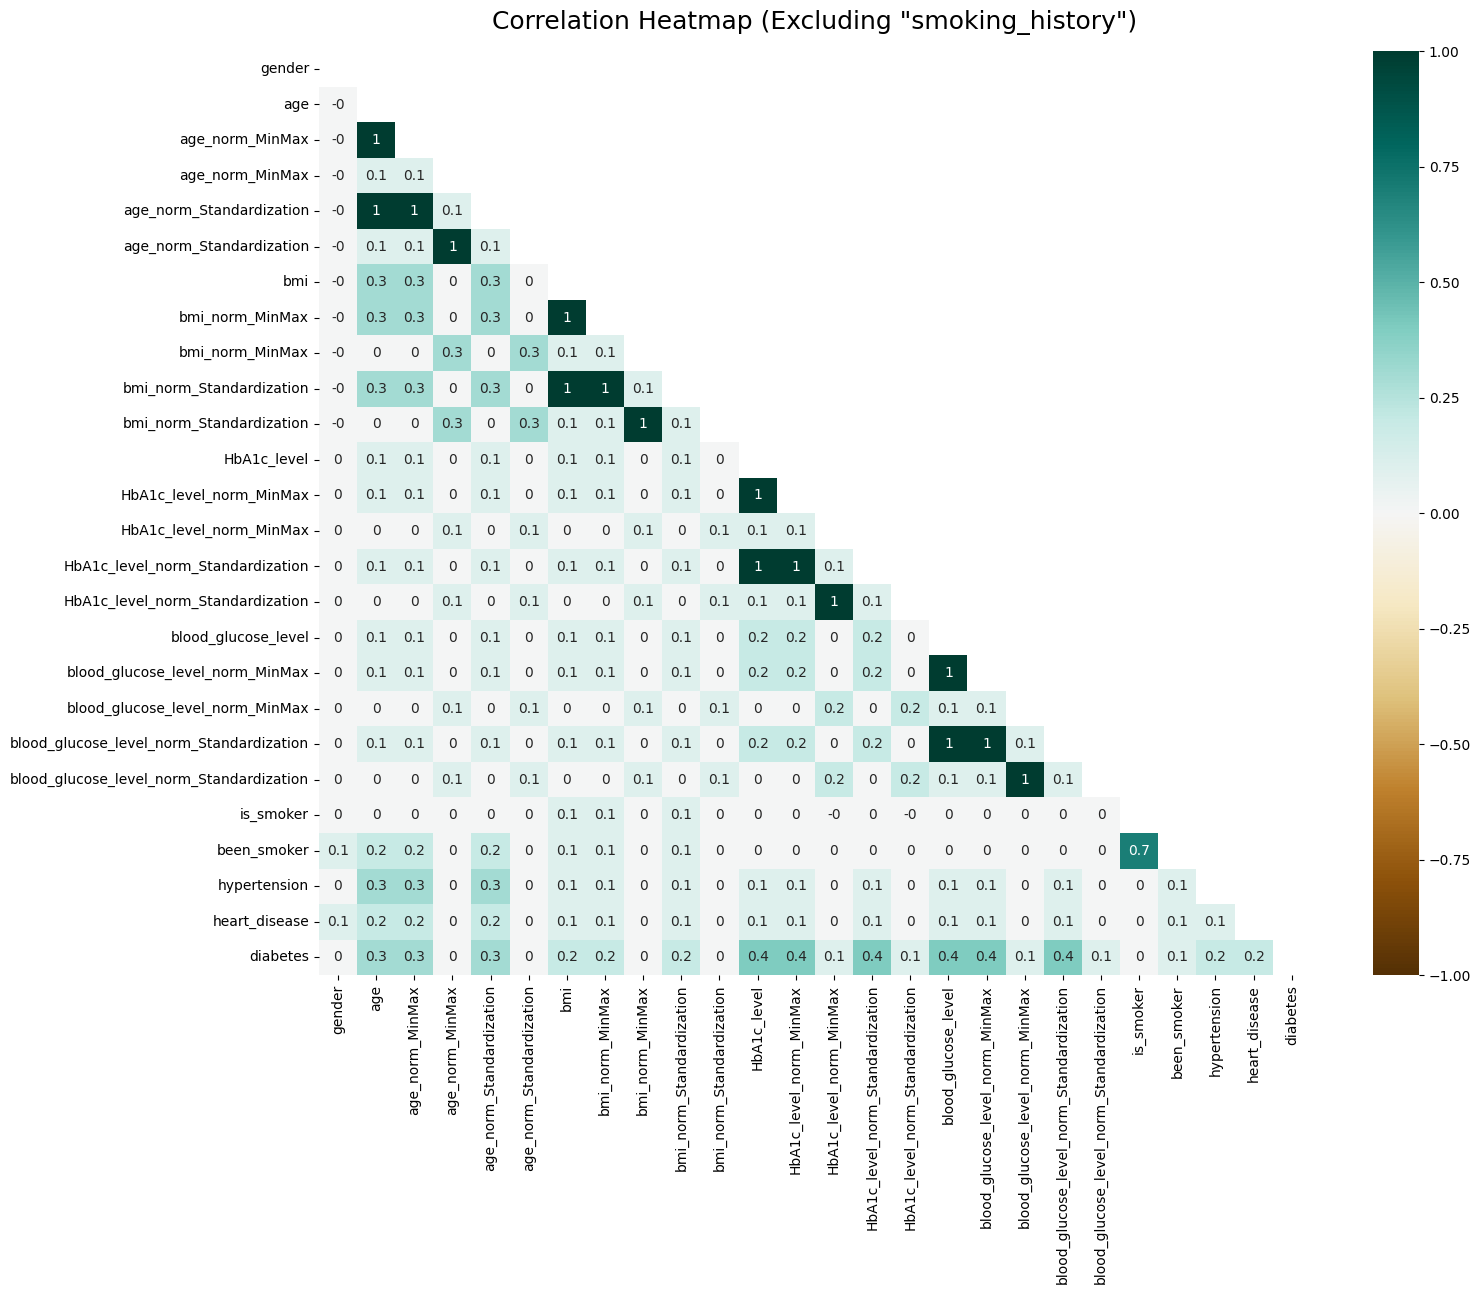

In [47]:
# Dropping 'smoking_history' column from the data
data_without_smoking = data.drop('smoking_history', axis=1)

# Create a Correlation Heatmap
plt.figure(figsize=(16, 12)) 
mask = np.triu(np.ones_like(data_without_smoking.corr(), dtype=bool))  # Use bool directly
heatmap = sns.heatmap(round(data_without_smoking.corr(), 1), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG') 
heatmap.set_title('Correlation Heatmap (Excluding "smoking_history")', fontdict={'fontsize':18}, pad=16)
plt.show()


In [48]:
# Save the modified DataFrame to a new CSV file named 'dataset.csv'
data.to_csv('dataset.csv', index=False)

## Splitting the Data:
- We should divide the dataset into features (X) and the target variable (y) representing diabetes status.
- Eventually, we need to split our data into training (80%) and testing (20%) sets.

In [62]:
# Load the dataset.csv file into a DataFrame
file_path = 'dataset.csv'  # Replace with the path to your dataset.csv file
data = pd.read_csv(file_path)

# Specify the features and target variable
features = ['gender', 'age', 'age_norm_MinMax', 'age_norm_Standardization', 'bmi', 'bmi_norm_MinMax', 'bmi_norm_Standardization', 'HbA1c_level', 'HbA1c_level_norm_MinMax', 'HbA1c_level_norm_Standardization', 'blood_glucose_level', 'blood_glucose_level_norm_MinMax', 'blood_glucose_level_norm_Standardization', 'smoking_history', 'is_smoker', 'been_smoker', 'hypertension', 'heart_disease']
target = 'diabetes'

# Split the data into features (X) and target variable (y)
X = data[features]
y = data[target]

# Split the data into 80% training set and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("Training set shape - Features:", X_train.shape, " Target:", y_train.shape)
print("Testing set shape - Features:", X_test.shape, " Target:", y_test.shape)


Training set shape - Features: (80000, 18)  Target: (80000,)
Testing set shape - Features: (20000, 18)  Target: (20000,)


## Analyzing Model function:
This is a function for analyzing accuracy, precision, recall, and F1-score. we should call this method for each model and represent the results.

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    return accuracy, precision, recall, f1

# Assume X_train, X_test, y_train, y_test are already defined from previous splits
# model will be a specific model instance (e.g., LinearRegression(), LogisticRegression(), etc.)

# Example usage:
# model = LinearRegression()  # Replace with the specific model you want to evaluate

# accuracy, precision, recall, f1 = evaluate_model(model, X_train, X_test, y_train, y_test)
# print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}")
